In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <b><font size="7" color="red">ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matpoltlib : 파이썬에서 가장 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 차트가능. groupby 기능을 추가한 라이브러리

# 1장 matplotlib
https://matplotlib.org/stable/api/pyplot_summary.html
https://pypi.org/project/matplotlib/

## 1.1 패키지 및 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
# 한글설정(windows)

# warnning 안보이게
import warnings
warnings.filterwarnings(action='ignore') # warning 안 보아는 설정

## 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1) 데이터 준비 <br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

In [ ]:
x = [1, 2, 3]
y = [-2, 4, 6]
plt.figure(figsize=(7, 2)) # 그래프 객체 생성 사이즈는 인치
plt.plot(x, y)
plt.ylabel('some number') # 커스터마이징
# plt.show() # 출력
plt.savefig('data/ch12.png', bbox_inches='tight') # 파일 출력

## 1.3 그래프 영역 나누기
1) subplot() 함수로 서브플롯 추가 

In [3]:
import numpy as np
x = np.arange(0, 10, 0.1)# np.linspace(0, 9.9, 100)

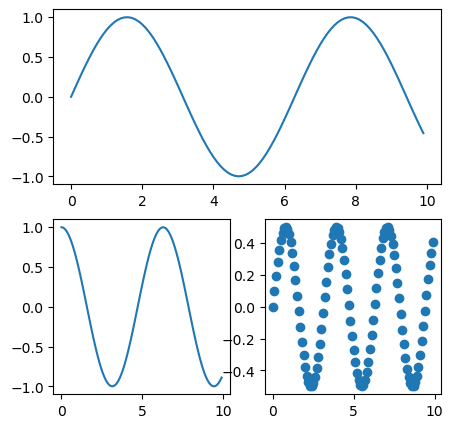

In [8]:
plt.figure(figsize=(5,5))
plt.subplot(2, 1, 1) # 2행 1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4)
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

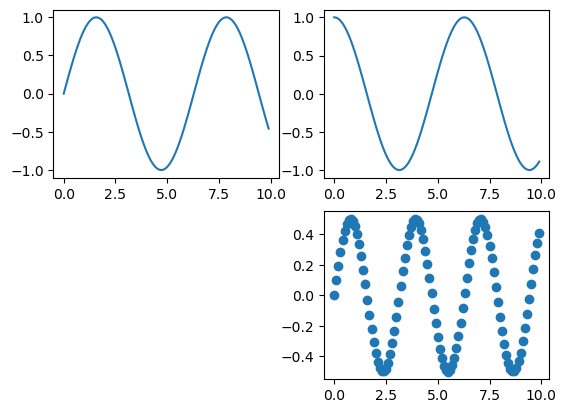

In [11]:
plt.subplot(2, 1, 1) # 2행 1열로 subplot에서 1번째 subplot은 다음과 같이 그린다
plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2) # 2행 2열 subplot중 3번째 subplot
plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4)
plt.scatter(x, np.sin(x)*np.cos(x))
plt.show()

### 2) subplots() 함수로 서브플롯 추가
- plot함수에 색상이나 스타일 조정(교안 14page)https://wikidocs.net/92085

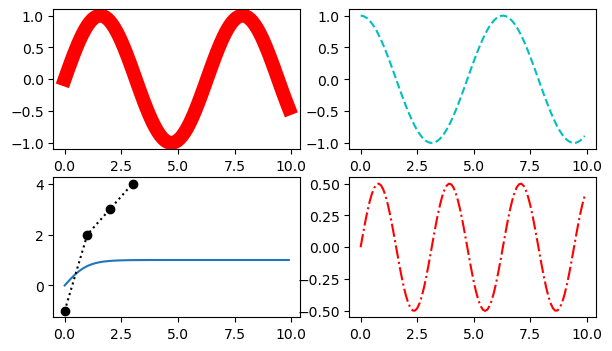

In [15]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), c='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--') # c='c', linestyle='--'
axes[1,0].plot(x, np.tanh(x))
axes[1,0].plot([0,1,2,3], [-1,2,3,4], 'ko:') # k:block, marker='o', linestyle=':'
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

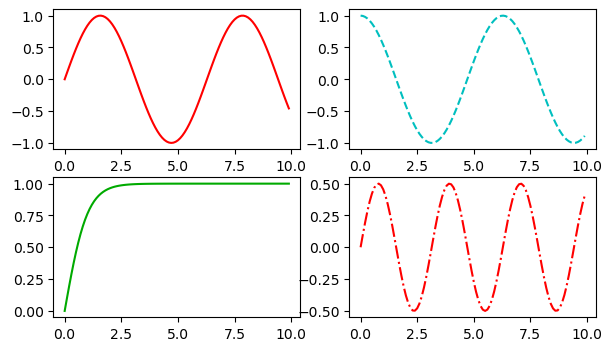

In [17]:
# 2행 2열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(2, 2, figsize=(7,4))
list(enumerate(axes.flat))
for i, ax in enumerate(axes.flat):
    ax.plot(x, func[i](x), fmt[i])

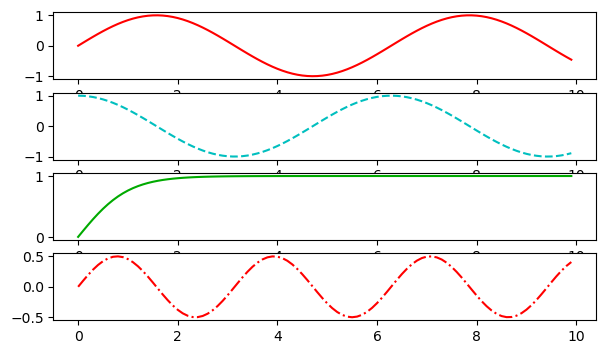

In [18]:
# 4행 1열 서브플롯(for)
func = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
fmt = ['r', 'c--', '#00AA00', 'r-.']
fig, axes = plt.subplots(4, 1, figsize=(7,4))
for i, ax in enumerate(axes):
    ax.plot(x, func[i](x), fmt[i])

## 1.4 다양한 그래프 그리기
### 1) pyplot 함수들(교안 16page)
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선그래프
### 3) pandas.DataFrame.plot()
- plt.____(x, y, fmt)
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None)
    - kind : line(기본값), scatter(점도표), bar, barh, density, hist, pie(한컬럼만)....

In [5]:
import seaborn as sns
iris = sns.load_dataset('iris')

- 교안(20page) https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot:

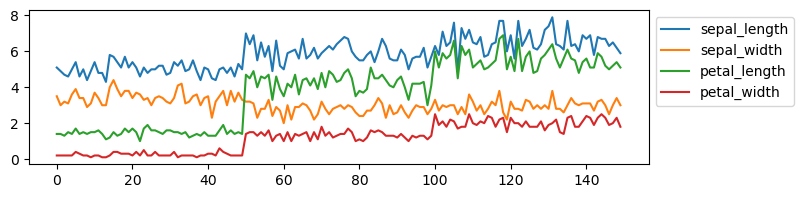

In [13]:
# plt.figure(figsize=(8,2))
# plt.plot(iris.index, iris.iloc[:,:-1])
ax = iris.plot(kind='line', figsize=(8,2))
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

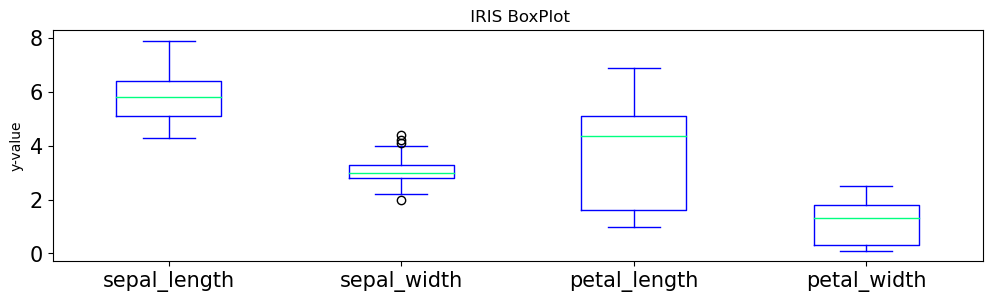

In [15]:
iris.plot(kind='box', figsize=(12,3), title=' IRIS BoxPlot',
         ylabel='y-value', fontsize=15, colormap='winter')
plt.show()

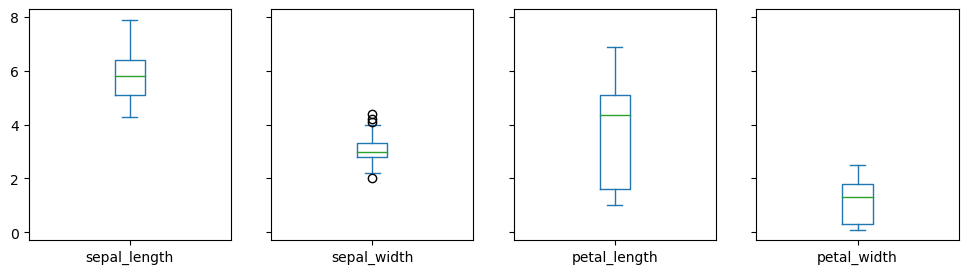

In [19]:
iris.plot(kind='box', figsize=(12,3), subplots=True, sharey=True)
plt.show()

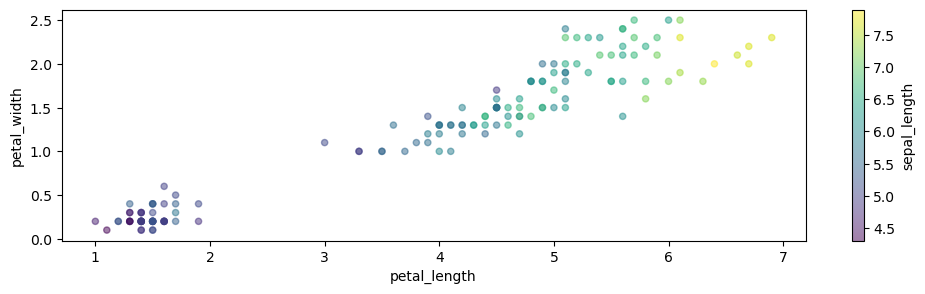

In [21]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3),
         c='sepal_length', alpha=0.5)
plt.show()

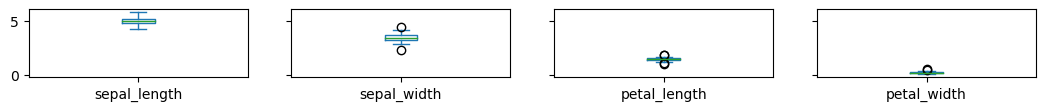

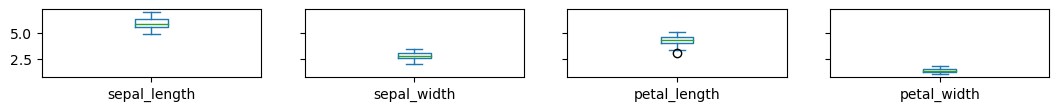

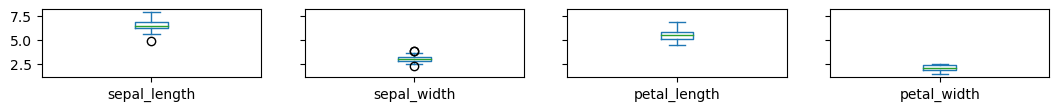

In [22]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', figsize=(13,3),
                            subplots=True,
                            layout=(3,4),
                            sharey=True)
plt.show()

### 4) plt.scatter() : 산점도

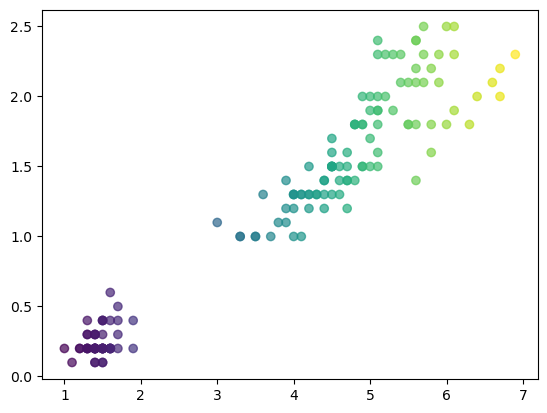

In [23]:
plt.scatter(iris.petal_length, iris.petal_width,
           c = iris.petal_length*20,
           alpha=0.7)

## 1.5 그 외 그래프 그리기
### 1) boxplot, violinplt

https://www.research.autodesk.com/publications/same-stats-different-graphs
동일한 통계 , 다른 그래프

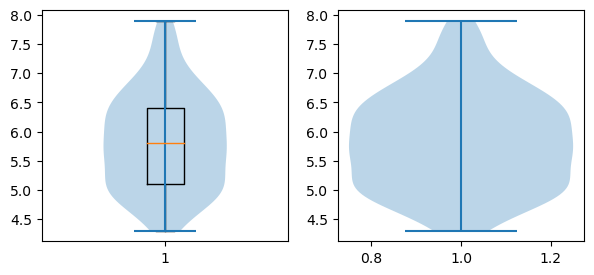

In [27]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()

### 2) bar(), barh()

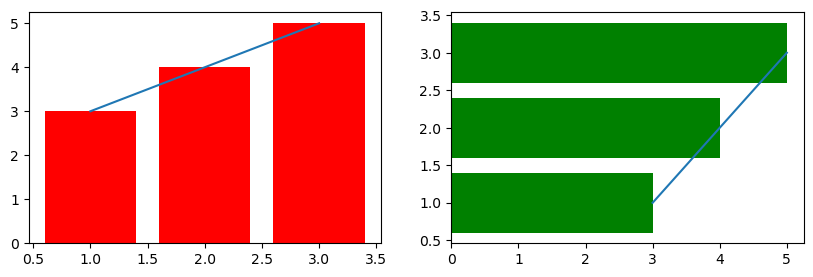

In [28]:
x = [1, 2, 3]
y = [3, 4, 5]
fig, axes = plt.subplots(ncols=2, figsize=(10,3))
axes[0].bar(x, y, color='r')
axes[0].plot(x,y)
axes[1].barh(x, y, color='g')
axes[1].plot(y, x)
plt.show()

### 3)hist(도수분포표, 히스토그램)

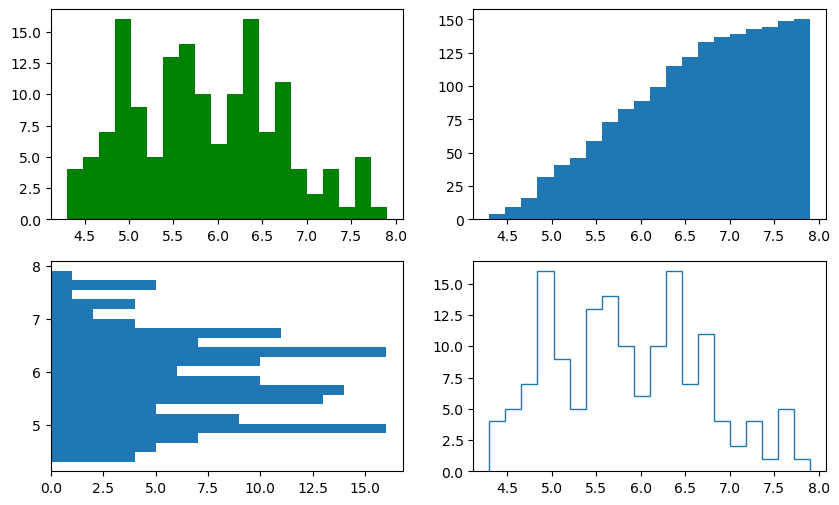

In [32]:
fig, axes = plt.subplots(nrows=2 ,ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='g') # 히스토그램
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) # 누적 히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal')
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step')
plt.show()

### 4) axvline(), axhline(), fill(), fill_between()

In [33]:
import numpy as np

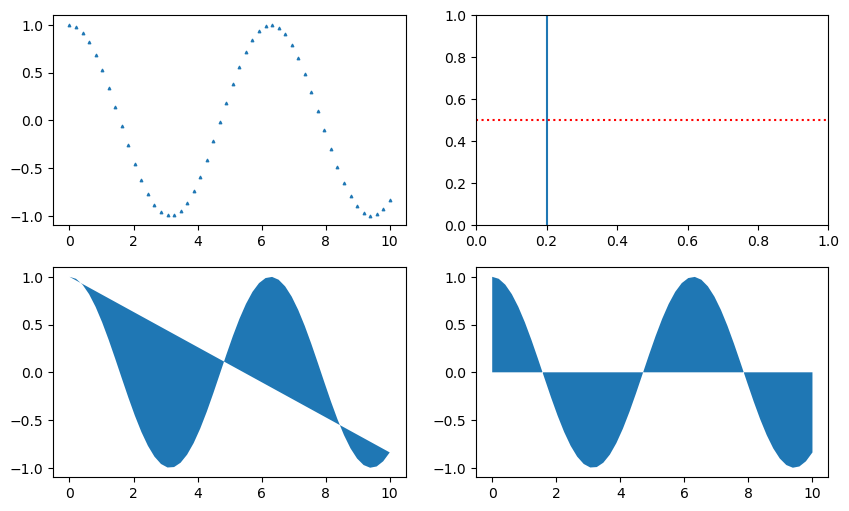

In [35]:
x = np.linspace(0,10) # 0부터 10까지 일정한 간격으로 50(기본값)개 수 추출
y = np.cos(x)
fig, axes = plt.subplots(nrows=2 ,ncols=2, figsize=(10,6))
axes[0,0].scatter(x, y, s=3, marker='^')
axes[0,1].axvline(0.2)
axes[0,1].axhline(0.5, color='r', linestyle=':')
axes[1,0].fill(x, y)
axes[1,1].fill_between(x, y)

### 5) linestyle
- 1차원

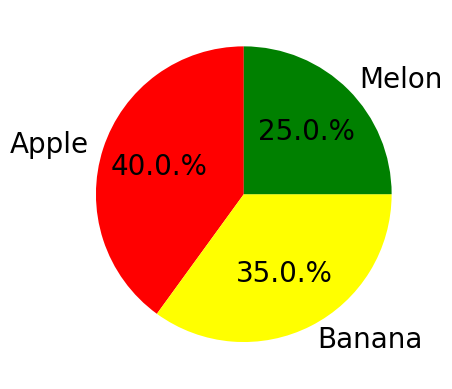

In [38]:
x = [40,35,25]
labels = ['Apple', 'Banana', 'Melon']
colors = ['red', 'yellow', 'green']
plt.pie(x, labels=labels, autopct='%.1f.%%', startangle=90, colors=colors,
       textprops={'fontsize':20})
plt.show()

## 1.6 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker
### 2) text(), annotate()

In [50]:
# 한글 설정1
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐방지

In [61]:
# 한글 설정2
from matplotlib.font_manager import FontProperties
font_file = 'C:/Windows/Fonts/H2PORM.TTF' # 네이버폰트, 구글폰트 다운
font_prop = FontProperties(fname=font_file, size=15)

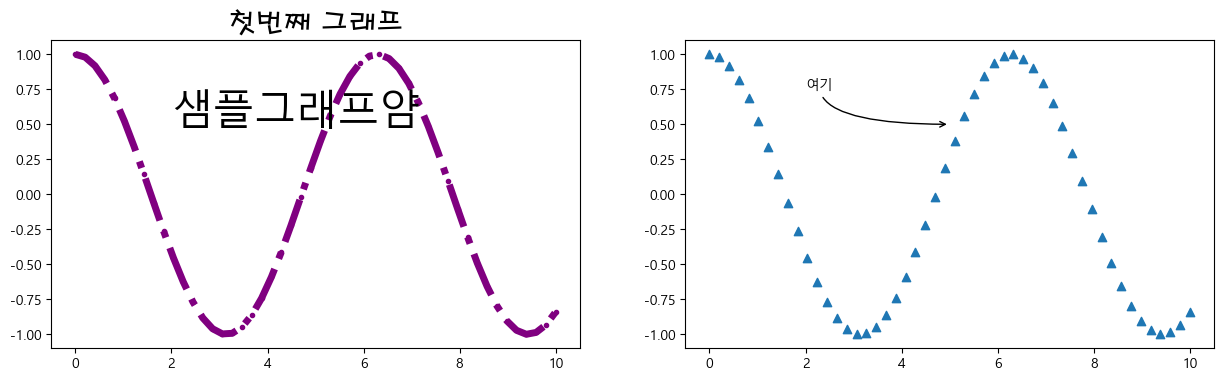

In [74]:
x = np.linspace(0, 10)
y = np.cos(x)
fig, axes = plt.subplots(ncols=2, figsize=(15,4))
axes[0].plot(x, y, linewidth=5, linestyle='-.', color='purple', marker='.')
axes[0].text(2, 0.5, '샘플그래프얌', fontsize=30, style='italic')
axes[0].set_title('첫번째 그래프', fontproperties=font_prop, fontsize=20)
axes[1].scatter(x, y, marker='^')
axes[1].annotate('여기', xytext=(2, 0.75), # 글자와 글자가 있을 좌표
               xy=(5, 0.5), # 화살표가 가리킬 좌표
               arrowprops=dict(arrowstyle='->', connectionstyle='angle3'))
plt.show()

### 3) 수학기호
- 교안 30page : 참고 : https://matplotlib.org/users/mathtext.html

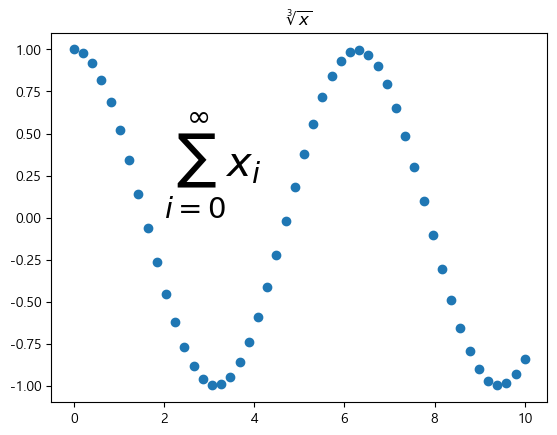

In [75]:
plt.scatter(x, y)
plt.text(2, 0.25, r'$\sum_{i=0}^\infty x_i$', fontsize=30)
plt.title(r'$\sqrt[3]{x}$')
plt.show()

### 4) 축과 눈금
- 교안 33page https://matplotlib.org/3.1.0/api/axis_api.html

ValueError: x and y must be the same size

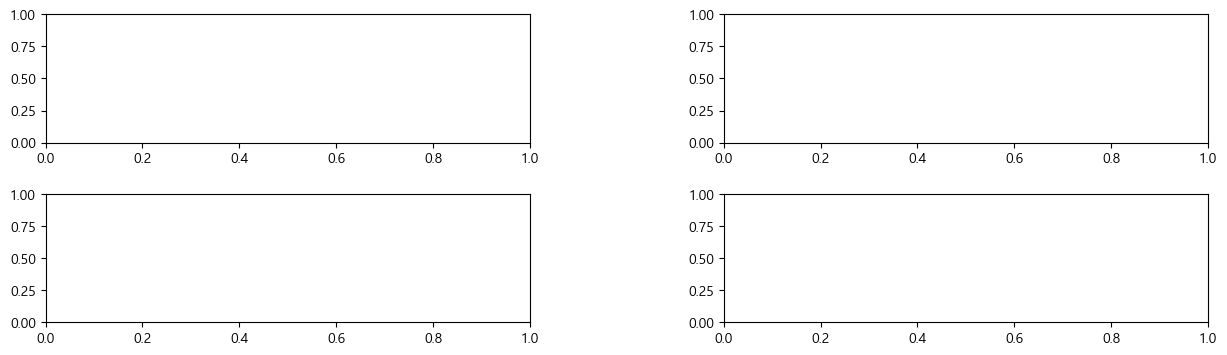

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,4))
# 서브플롯끼리 여백 조정(title, x축 lable)
plt.subplots_adjust(hspace=0.4, wspace=0.4) # hspace(위아래 여백, 1은 서브플롯높이) wspace(좌우여백)
axes[0,0].scatter(x, y)
axes[0,0].set(title='An_sample',
             ylabel='y값', xlabel='x값',
             xlim = [0,12], # x축 눈금 범위
             xticks = [0, 3, 6, 9, 12], # x축 눈금
             xticklabels = ['원점', '3점', '6점', '9점', 'max'], # x 눈금 라벨
             ylim = [-2, 2],
             yticks = [-2, -1, 1, 2],
             yticklabels = ['limit_min', '실제min', 'limit_max'])
axes[0,1].scatter(x, y, color='r', marker='+')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim([0,5])
axes[0,1].set_xticks(range(0,6,2))
axes[1,0].scatter(x, y)
axes[1,0].splnes['top'].set_visible(False)
axes[1,0].splnes['bottom'].set_position(('outward',10)) # 10pt 만큼 바깥쪽으로 이동
axes[1,1].scatter(x,y)
axes[1,1].grid(True)
plt.show()

### 5) 축공유

In [84]:
x = np.arange(0, 10)
y1 = 0.5*x**2
y2 = -y1

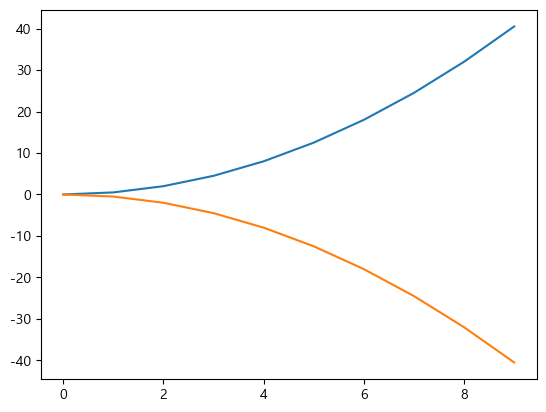

In [81]:
plt.plot(x,y1)
plt.plot(x,y2)

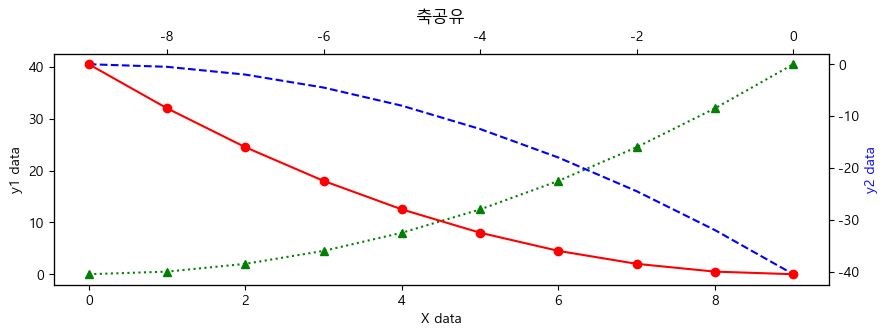

In [91]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel = 'X data', ylabel='y1 data')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 ax2
ax2.plot(x, y2, 'b--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3
ax3.plot(-x, y1, 'ro-')
plt.show()

### 6) 범례표시
### 7) 플롯스타일 지정

In [90]:
x = np.arange(0, 10)
y1 = 0.5*x**2
y2 = -y1

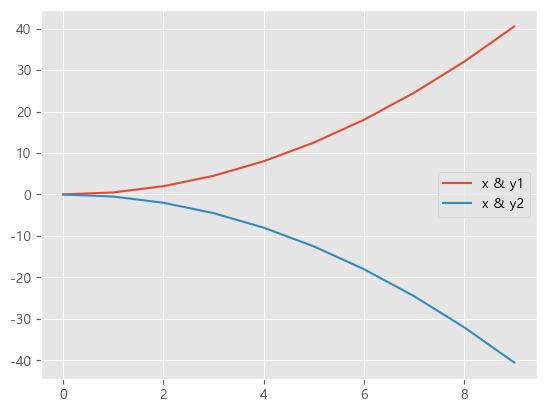

In [92]:
plt.style.use('ggplot') # default, ggplot, classic.....
plt.plot(x, y1, label='x & y1')
plt.plot(x, y2, label='x & y2')
plt.legend(loc='center right')
plt.show()